<a href="https://colab.research.google.com/github/adiegn/Soft-Computing/blob/main/M07_SCP_5200411486_Adie_Gunawan_Alwani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS RESPONSI**

* Nama        : Adie Gunawan Alwani
* NIM         : 5200411486
* Matkul      : Soft Computing Praktik I


In [7]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 13.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=87927d884fa4039d16648a5a6e42c3eaaa893032c96b9d2d7be153da14d88331
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [9]:
#library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#pembuatan semesta
#untuk variabel input
x_rainfall = np.arange (31, 689, 1)
x_area = np.arange (12500, 29368, 1)
x_demand = np.arange (3003550, 4200000, 1)

#untuk variabel output
x_product = np.arange (2300, 2800000, 1)

In [10]:
#fungsi keanggotaan
#curah hujan
rainfall_rendah = fuzz.trapmf(x_rainfall, [31,31,250,360])
rainfall_sedang = fuzz.trimf(x_rainfall, [250,360,469])
rainfall_tinggi = fuzz.trapmf(x_rainfall, [360,469,689,689])

#luas lahan
area_kecil = fuzz.trapmf(x_area, [12500, 12500, 18163, 20964])
area_sedang = fuzz.trimf(x_area, [18163,20964,23766])
area_besar = fuzz.trapmf(x_area, [20964,23766,29368, 29368])

#tingkat permintaan
demand_rendah = fuzz.trimf(x_demand, [3003550,3003550,4200000])
demand_tinggi = fuzz.trimf(x_demand, [3003550,4200000,4200000])

#produksi
product_sedikit = fuzz.trapmf(x_product, [2300,2300,934867,1401150])
product_sedang = fuzz.trimf(x_product, [934867,1401150,1867434])
product_banyak = fuzz.trapmf(x_product,
[1401150,1867434,2800000,2800000])

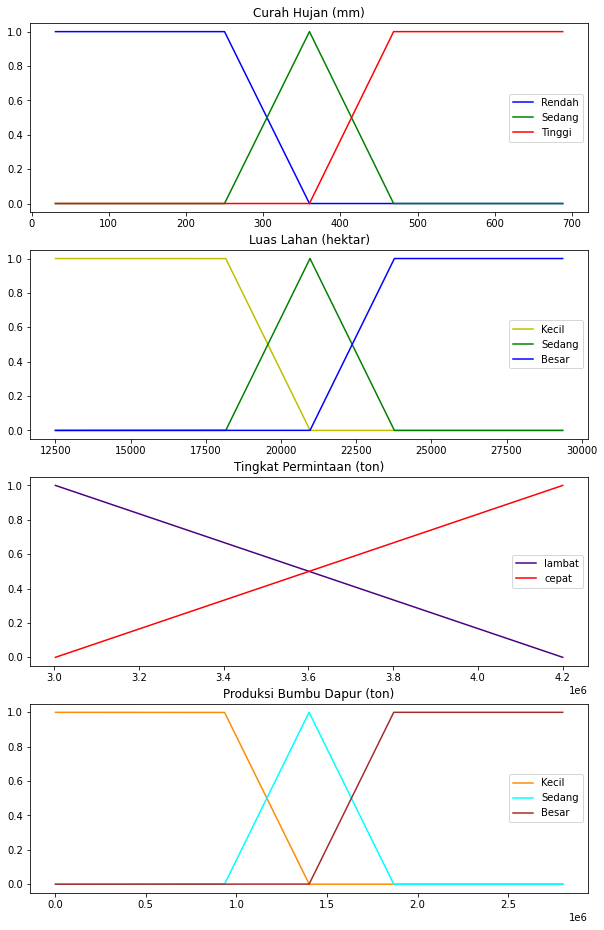

In [19]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4, figsize=(10,16))
ax0.plot(x_rainfall, rainfall_rendah, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_rainfall, rainfall_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_rainfall, rainfall_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title("Curah Hujan (mm)")
ax0.legend()

ax1.plot(x_area, area_kecil, 'y', linewidth = 1.5, label="Kecil")
ax1.plot(x_area, area_sedang, 'g', linewidth = 1.5, label="Sedang")
ax1.plot(x_area, area_besar, 'b', linewidth = 1.5, label="Besar")
ax1.set_title('Luas Lahan (hektar)')
ax1.legend()

ax2.plot(x_demand, demand_rendah, 'indigo', linewidth = 1.5,
label="lambat")
ax2.plot(x_demand, demand_tinggi, 'red', linewidth = 1.5,
label="cepat")
ax2.set_title('Tingkat Permintaan (ton)')
ax2.legend()

ax3.plot(x_product, product_sedikit, 'darkorange', linewidth = 1.5,
label="Kecil")
ax3.plot(x_product, product_sedang, 'aqua', linewidth = 1.5,
label="Sedang")
ax3.plot(x_product, product_banyak, 'brown', linewidth = 1.5,
label="Besar")
ax3.set_title('Produksi Bumbu Dapur (ton)')
ax3.legend()

**Berapa ton bumbu dapur yang harus diproduksi jika : curah hujan 200 mm, luas 15000, permintaan 3800000**

In [12]:
#fuzzification
rainfall_level_rendah = fuzz.interp_membership(x_rainfall, rainfall_rendah, 200)
rainfall_level_sedang = fuzz.interp_membership(x_rainfall, rainfall_sedang, 200)
rainfall_level_tinggi = fuzz.interp_membership(x_rainfall, rainfall_tinggi, 200)

area_level_kecil = fuzz.interp_membership(x_area, area_kecil, 15000)
area_level_sedang = fuzz.interp_membership(x_area, area_sedang, 15000)
area_level_besar = fuzz.interp_membership(x_area, area_besar, 15000)
demand_level_rendah = fuzz.interp_membership(x_demand, demand_rendah,
3800000)
demand_level_tinggi = fuzz.interp_membership(x_demand, demand_tinggi,
3800000)

print(rainfall_level_rendah, rainfall_level_sedang, rainfall_level_tinggi)
print(area_level_kecil, area_level_sedang, area_level_besar)
print(demand_level_rendah, demand_level_tinggi)

1.0 0.0 0.0
1.0 0.0 0.0
0.33432237034560575 0.6656776296543943


In [20]:
#rule
#sedikit
active_rule1=min(rainfall_level_rendah, area_level_kecil,demand_level_rendah)
#sedang
active_rule2=min(rainfall_level_rendah, area_level_kecil,demand_level_tinggi)
#sedikit
active_rule3=min(rainfall_level_rendah, area_level_sedang,demand_level_rendah)
#banyak
active_rule4=min(rainfall_level_rendah, area_level_sedang,demand_level_tinggi)
#sedikit
active_rule5=min(rainfall_level_rendah, area_level_besar,demand_level_rendah)
#sedang
active_rule6=min(rainfall_level_rendah, area_level_besar,demand_level_tinggi)
#sedikit
active_rule7=min(rainfall_level_sedang, area_level_kecil,demand_level_rendah)
#banyak
active_rule8=min(rainfall_level_sedang, area_level_kecil,demand_level_tinggi)
#sedang
active_rule9=min(rainfall_level_sedang, area_level_sedang,demand_level_rendah)
#banyak
active_rule10=min(rainfall_level_sedang, area_level_sedang,demand_level_tinggi)
#sedang
active_rule11=min(rainfall_level_sedang, area_level_besar,demand_level_rendah)
#banyak
active_rule12=min(rainfall_level_sedang, area_level_besar,demand_level_tinggi)
#curah hujan tinggi
#sedikit
active_rule13=min(rainfall_level_tinggi, area_level_kecil,demand_level_rendah)
#sedang
active_rule14=min(rainfall_level_tinggi, area_level_kecil,demand_level_tinggi)
#sedang
active_rule15=min(rainfall_level_tinggi, area_level_sedang,demand_level_rendah)
#banyak
active_rule16=min(rainfall_level_tinggi, area_level_sedang,demand_level_tinggi)
#sedikit
active_rule17=min(rainfall_level_tinggi, area_level_besar,demand_level_rendah)
#banyak
active_rule18=min(rainfall_level_tinggi, area_level_besar,demand_level_tinggi)

print(active_rule1,active_rule2,active_rule3,active_rule4,active_rule5,active_rule6, active_rule7, active_rule8, active_rule9,
active_rule10,
active_rule11,active_rule12,active_rule13,active_rule14,active_rule15,active_rule16,active_rule17,active_rule18)
#------------------------------------------------------------------------------------------------------------------------------
#output
act_product1=np.fmin(active_rule1, product_sedikit)
act_product2=np.fmin(active_rule2, product_sedang)
act_product3=np.fmin(active_rule3, product_sedikit)
act_product4=np.fmin(active_rule4, product_banyak)
act_product5=np.fmin(active_rule5, product_sedikit)
act_product6=np.fmin(active_rule6, product_sedang)
act_product7=np.fmin(active_rule7, product_sedikit)
act_product8=np.fmin(active_rule8, product_banyak)
act_product9=np.fmin(active_rule9, product_sedang)
act_product10=np.fmin(active_rule10, product_banyak)
act_product11=np.fmin(active_rule11, product_sedang)
act_product12=np.fmin(active_rule12, product_banyak)
act_product13=np.fmin(active_rule13, product_sedikit)
act_product14=np.fmin(active_rule14, product_sedang)
act_product15=np.fmin(active_rule15, product_sedang)
act_product16=np.fmin(active_rule16, product_banyak)
act_product17=np.fmin(active_rule17, product_sedikit)
act_product18=np.fmin(active_rule18, product_banyak)
product0 = np.zeros_like(x_product)

0.33432237034560575 0.6656776296543943 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


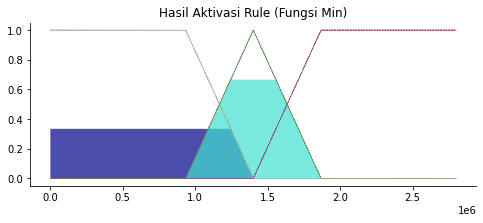

In [16]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_product, product0, act_product1,
facecolor='darkblue', alpha=0.7)
ax0.plot(x_product, product_sedikit, 'darkblue', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product2,
facecolor='turquoise', alpha=0.7)
ax0.plot(x_product, product_sedang, 'turquoise', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product3, facecolor='r',
alpha=0.7)
ax0.plot(x_product, product_sedikit, 'r', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product4,
facecolor='maroon', alpha=0.7)
ax0.plot(x_product, product_banyak, 'maroon', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product5,
facecolor='chartreuse', alpha=0.7)
ax0.plot(x_product, product_sedikit, 'chartreuse', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product6,
facecolor='limegreen', alpha=0.7)
ax0.plot(x_product, product_sedang, 'limegreen', linewidth=0.5,
linestyle='--')

ax0.fill_between(x_product, product0, act_product7, facecolor='cyan',
alpha=0.7)
ax0.plot(x_product, product_sedikit, 'cyan', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product8,
facecolor='magenta', alpha=0.7)
ax0.plot(x_product, product_banyak, 'magenta', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0,
act_product9,facecolor='rosybrown', alpha=0.7)
ax0.plot(x_product, product_sedang, 'rosybrown', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product10,
facecolor='coral', alpha=0.7)
ax0.plot(x_product, product_banyak, 'coral', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product11,
facecolor='slategrey', alpha=0.7)
ax0.plot(x_product, product_sedang, 'slategrey', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product12,
facecolor='indigo', alpha=0.7)
ax0.plot(x_product, product_banyak, 'indigo', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product13,
facecolor='powderblue', alpha=0.7)
ax0.plot(x_product, product_sedikit, 'powderblue', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product14,
facecolor='olive', alpha=0.7)
ax0.plot(x_product, product_sedang, 'olive', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product15,
facecolor='seagreen', alpha=0.7)
ax0.plot(x_product, product_sedang, 'seagreen', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product16,
facecolor='steelblue', alpha=0.7)
ax0.plot(x_product, product_banyak, 'steelblue', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product17, facecolor='tan',
alpha=0.7)
ax0.plot(x_product, product_sedikit, 'tan', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_product, product0, act_product18,
facecolor='sienna', alpha=0.7)
ax0.plot(x_product, product_banyak, 'sienna', linewidth=0.5,
linestyle='--')

#tambahan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom
    ax.get_yaxis().tick_left
plt.tight_layout
plt.title('Hasil Aktivasi Rule (Fungsi Min)')

In [21]:
aggregated = np.fmax(act_product1,
                     np.fmax(act_product2,
                             np.fmax(act_product3,
                                     np.fmax(act_product4,
                                             np.fmax(act_product5,
                                                     np.fmax(act_product6,
                                                             np.fmax(act_product7,
                                                                     np.fmax(act_product8,
                                                                             np.fmax(act_product9,
                                                                                     np.fmax(act_product10,
                                                                                             np.fmax(act_product11,np.fmax(act_product12,np.fmax(act_product13,np.fmax(act_product14,np.fmax(act_product15,np.fmax(act_product16,np.fmax(act_product17,act_product18)))))))))))))))))

product = fuzz.defuzz(x_product, aggregated, 'som')
product_activation = fuzz.interp_membership(x_product, aggregated,
product)
print("Bumbu yang harus diproduksi yaitu :", product,'ton')

Bumbu yang harus diproduksi yaitu : 1245262 ton


Text(0.5, 1.0, 'Aggregated Membership and Result (line)')

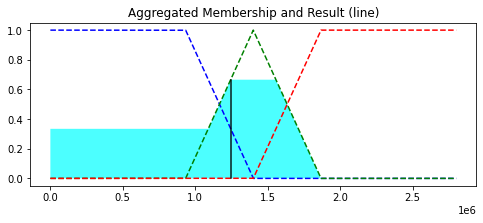

In [18]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_product, product_sedikit, 'b', linewidth=1.5,
linestyle='--')
ax0.plot(x_product, product_sedang, 'g', linewidth=1.5,
linestyle='--')
ax0.plot(x_product, product_banyak, 'r', linewidth=1.5,
linestyle='--')
ax0.fill_between(x_product, product0, aggregated, facecolor = 'cyan',
alpha=0.7)
ax0.plot([product, product], [0, product_activation],'k',
linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Membership and Result (line)')